# Wifi QR code

- Get Wifi name & password from your laptop
- Generate QR code

---

## Import Lib

In [2]:
import subprocess
import wifi_qrcode_generator

from PIL import Image, ImageDraw, ImageFont

---

## Functions

Get Wifi info

In [3]:
def get_wifi_info():
    try:
    # Get wifi details from PC
        # Get wifi profile
        wifi_info = subprocess.check_output(['netsh', 'wlan', 'show', 'interfaces']).decode('utf-8').split('\n')
        wifi_name = str([profile_result.split(":")[1] for profile_result in wifi_info if 'Profile' + 16 * ' ' + ':' in profile_result][0]).strip() # Wifi SSID

        # Get password
        password_info = subprocess.check_output(['netsh', 'wlan', 'show', 'profiles', wifi_name, 'key=clear']).decode('utf-8').split('\n')
        password = str([password_result.split(":")[1] for password_result in password_info if "Key Content" in password_result][0]).strip()

    except:
        # Ask wifi details from user
        print('Something went wrong, please enter manually your wifi:\n')
        wifi_name = input('Wifi name: ')
        password = input('Password: ')
    
    return wifi_name, password

Generate QR code

In [4]:
def generate_qr_code(wifi_name, password, show_wifi_info = False):
    wifi = '\n| ' + wifi_name + '\n| ' + password
    print(wifi)
        
    # Generate QRcode
    qrcode_name = input('\nQR code name:')
    print('')

    qrcode = wifi_qrcode_generator.wifi_qrcode(wifi_name, False, 'WPA', password)
    
    if not show_wifi_info:
        new_qrcode = qrcode

    else: 
        y_padding = 60
        old_size = qrcode.size
        new_size = (old_size[0], old_size[0] + y_padding)

        new_qrcode = Image.new("RGB", new_size, color = (255, 255, 255))
        new_qrcode.paste(qrcode, (0, y_padding))

        draw = ImageDraw.Draw(new_qrcode)
        font = ImageFont.truetype('Fonts\\Futura.ttf', 20)
        draw.text((38, 0), wifi, fill = (0, 0, 0), font = font)

    new_qrcode.save(qrcode_name + '.png')

    return new_qrcode

---

## Generate QRcode


| Random_Wifi_Name
| Random_Password



QR code name: Wifi Random


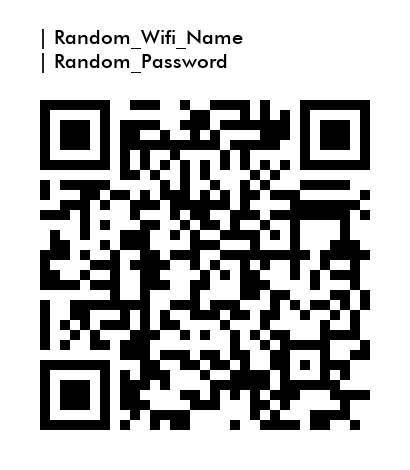

In [7]:
wifi_name, password = get_wifi_info()
qr_code = generate_qr_code(wifi_name, password, show_wifi_info = True)

qr_code

---